# **6. 다양한 머신러닝 기법들**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB6-4 커널 트릭을 이용한 비선형 SVM**

In [3]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML2nd/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')

from sklearn.svm import SVC  # 커널 트릭을 사용할 수 있는 SVM 분류기
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = df[['x1', 'x2']]
y = df['y']

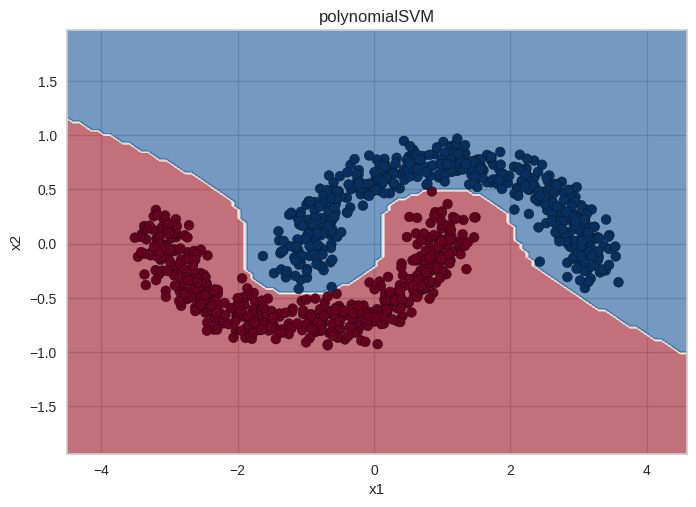

In [4]:
polynomial_svm_clf = Pipeline([
   ("scaler", StandardScaler()),
   ("svm_clf", SVC(C=10, kernel = 'poly', degree = 4, coef0=2))
])
polynomial_svm_clf.fit(X, y)

from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

DecisionBoundaryDisplay.from_estimator(
    polynomial_svm_clf, X, cmap="RdBu", alpha=0.6, response_method="predict"
)
plt.scatter(X['x1'], X['x2'], c=y, cmap="RdBu", edgecolor='k', s=50)
plt.title("polynomialSVM")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()


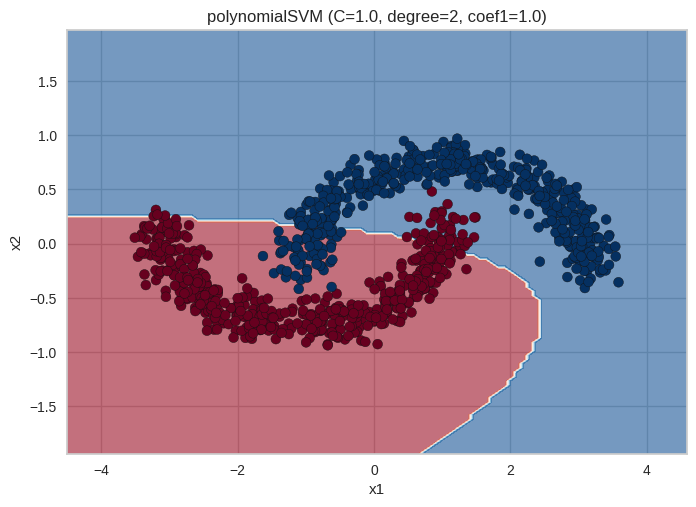

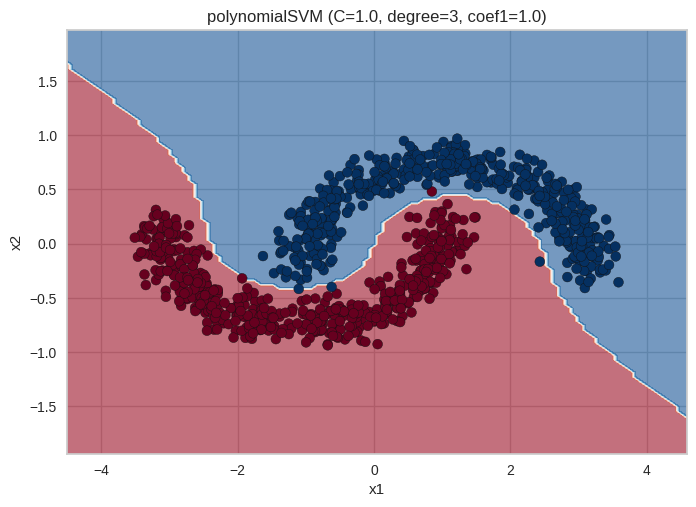

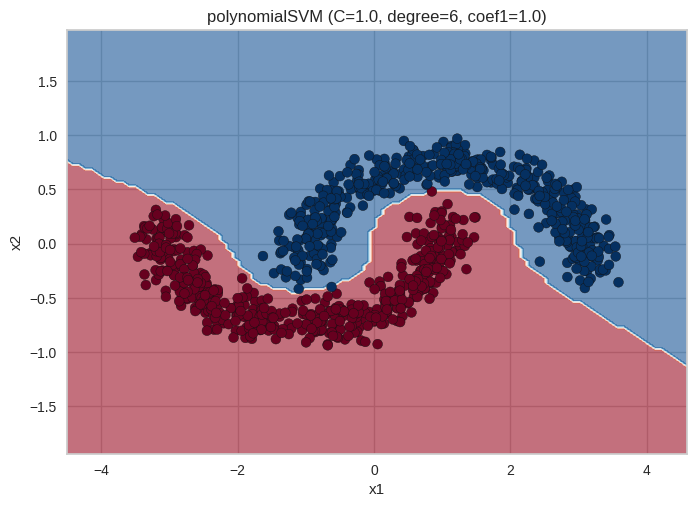

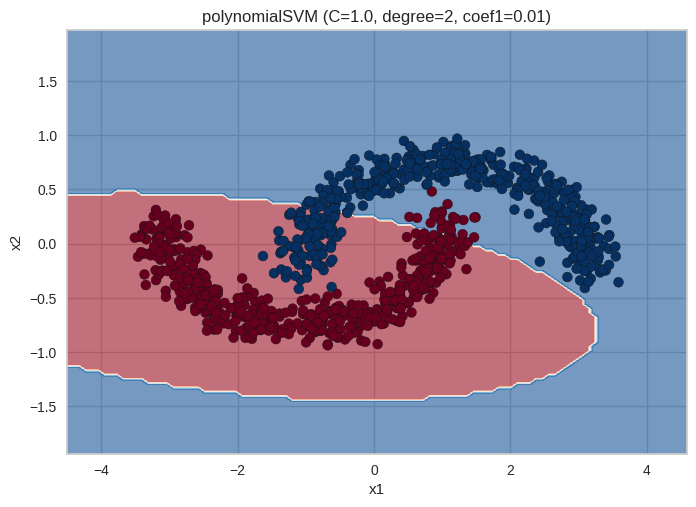

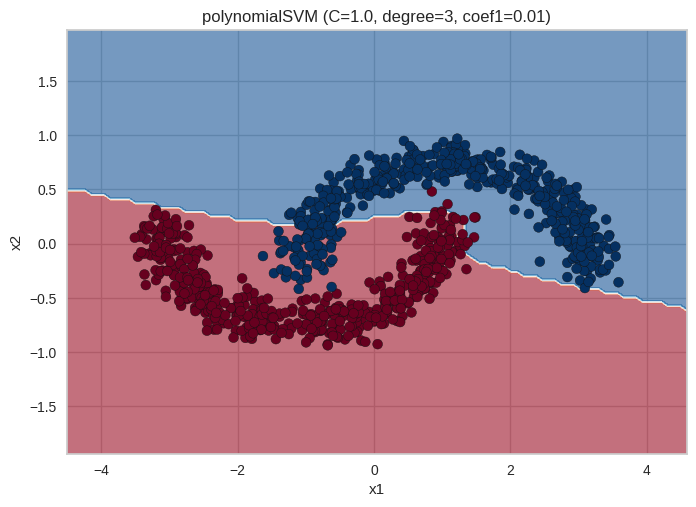

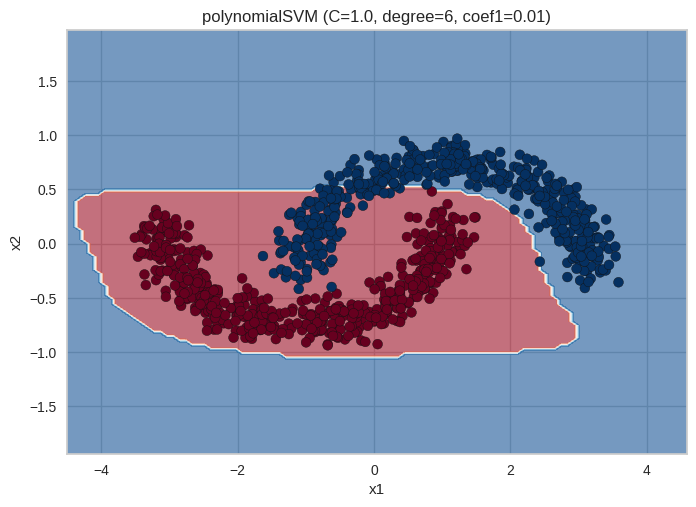

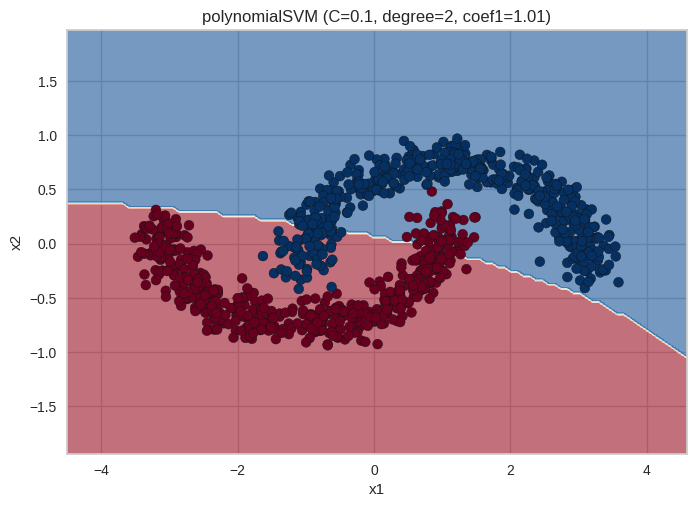

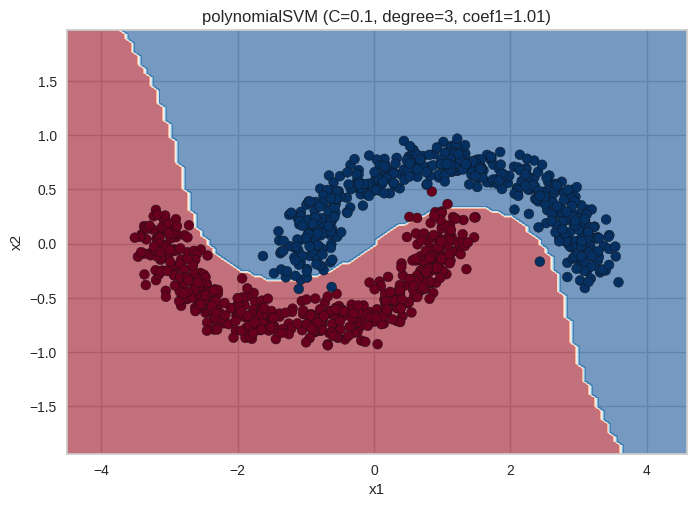

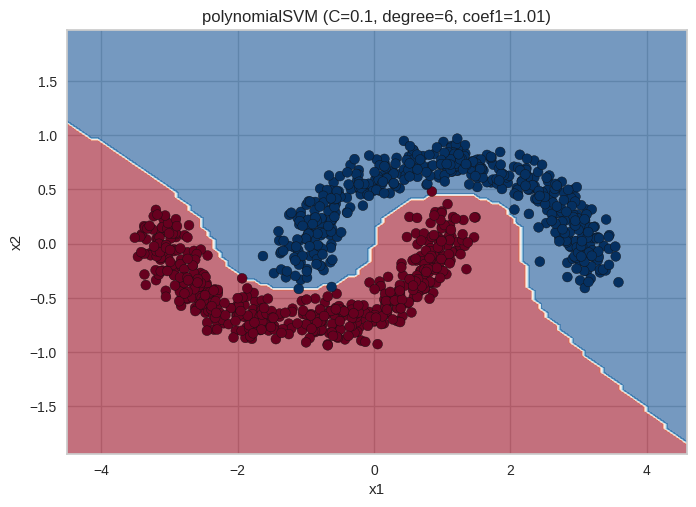

In [11]:
params = [(1.0, 2, 1.0), (1.0, 3, 1.0), (1.0, 6, 1.0),
          (1.0, 2, 0.01), (1.0, 3, 0.01), (1.0, 6, 0.01),
          (0.1, 2, 1.0), (0.1, 3, 1.0), (0.1, 6, 1.0)]

for C, degree, c in params:
    polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=C, kernel = 'poly', degree = degree, coef0=c))
    ])
    polynomial_svm_clf.fit(X, y)

    from sklearn.inspection import DecisionBoundaryDisplay
    import matplotlib.pyplot as plt

    DecisionBoundaryDisplay.from_estimator(
        polynomial_svm_clf, X, cmap="RdBu", alpha=0.6, response_method="predict"
    )
    plt.scatter(X['x1'], X['x2'], c=y, cmap="RdBu", edgecolor='k', s=50)
    plt.title(f"polynomialSVM (C={C}, degree={degree}, coef1={c})")
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()